In [1]:
! pip install seaborn

In [2]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns

df_clients_profile = pd.read_csv('../Data/raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/raw/df_final_experiment_clients.txt')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [3]:
#lenght of the dataframes
lenght_clients_profile = print(df_clients_profile.shape)
lenght_experiment_clients = print(df_experiment_clients.shape)
lengt_web_data = print(df_web_data.shape)

(70609, 9)
(70609, 2)
(755405, 5)


In [4]:
#clean df
df_clients_profile = print_clean_data(df_clients_profile)

Before
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
------------------------------------------
------------------------------------------
After
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [5]:
#clean df
df_experiment_clients = print_clean_data(df_experiment_clients)

Before
client_id        0
Variation    20109
dtype: int64
------------------------------------------
To many NaN values in column: Variation
------------------------------------------
After
client_id        0
Variation    20109
dtype: int64


In [6]:
#clean df
df_web_data = print_clean_data(df_web_data)

Before
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
------------------------------------------
------------------------------------------
After
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [7]:
df_null_experiment_clients = df_experiment_clients.isna()
df_null_experiment_clients

,client_id,Variation
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
70604,False,True
70605,False,True
70606,False,True
70607,False,True


In [8]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
#setting aside the clients that wont be part if the experiment
null_df_experiment_clients = df_experiment_clients[df_experiment_clients['Variation'].isnull()]
null_df_experiment_clients

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [10]:
#id of clients that are part of the test
df_experiment_clients_Test = df_experiment_clients[df_experiment_clients['Variation'] == 'Test']
df_experiment_clients_Test.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
3,1982004,Test
5,9466803,Test
6,3170143,Test
8,5887227,Test
10,438567,Test
11,2519971,Test
13,5407849,Test
16,5308474,Test


In [11]:
final_df_Test = pd.merge(df_experiment_clients_Test, df_clients_profile, on='client_id', how='inner')
final_df_Test = pd.merge(df_web_data, final_df_Test, on='client_id', how='inner')
df_test = final_df_Test
df_test.to_csv('df_test.csv', index=False)
#change the data type to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time']) 
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


In [12]:
df_test.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [13]:
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
final_df_Control = pd.merge(df_experiment_clients_Control, df_clients_profile, on='client_id', how='inner')
final_df_Control = pd.merge(df_web_data, final_df_Control, on='client_id', how='inner')
df_control = final_df_Control
df_control.to_csv('df_control.csv', index=False)
#change the data type to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time']) 
df_control.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


# Day 1 & 2 (Week 5)

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


In [14]:
# Displaying the data types of each column in the dataframe
df_test.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [15]:
# Displaying the data types of each column in the dataframe
df_control.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [16]:
# Retrieving the unique data types present in the df_test
list(set(df_test.dtypes.tolist()))

[dtype('int64'), dtype('<M8[ns]'), dtype('O'), dtype('float64')]

In [17]:
# Retrieving the unique data types present in the df_control
list(set(df_control.dtypes.tolist()))

[dtype('int64'), dtype('<M8[ns]'), dtype('O'), dtype('float64')]

In [18]:
# Extracting column names with numerical data types from the dataframe
df_test.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [19]:
# Counting and sorting the unique values for each numerical column in descending order
df_test.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           26961
bal                 26907
clnt_tenure_mnth      444
clnt_age              157
clnt_tenure_yr         49
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [20]:
# Extracting column names with numerical data types from the dataframe
df_control.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [21]:
# Counting and sorting the unique values for each numerical column in descending order
df_control.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           23526
bal                 23488
clnt_tenure_mnth      443
clnt_age              155
clnt_tenure_yr         52
calls_6_mnth            7
logons_6_mnth           7
num_accts               6
dtype: int64

In [22]:
df_control.head(10).sort_index()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


In [23]:

import pandas as pd

# ... (Your code to read the data into df_control) ...

# 1. Data Preparation:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])
df_control['date'] = df_control['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_control = df_control.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_control['next_date_time'] = df_control.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_control['time_diff_seconds'] = (df_control['next_date_time'] - df_control['date_time']).dt.total_seconds()
df_control['time_diff_minutes'] = df_control['time_diff_seconds'] / 60

In [24]:
df_control[(df_control.visit_id == '543158812_46395476577_767725') & (df_control.visitor_id == '194240915_18158000533')].sort_values('date_time')

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,next_date_time,time_diff_seconds,time_diff_minutes
106532,1104,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,NaT,NaN,NaN


In [25]:
df_control[(df_control.visit_id == '557292053_87239438319_391157')].sort_values('date_time')

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,next_date_time,time_diff_seconds,time_diff_minutes
55140,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:52:17,49.0,0.816667
55139,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:53:20,63.0,1.050000
55138,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:53:29,9.0,0.150000
55137,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:58:04,275.0,4.583333
55136,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:59:55,111.0,1.850000
55135,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:15,20.0,0.333333
55134,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:17,2.0,0.033333
55133,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:26,9.0,0.150000
55132,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,NaT,NaN,NaN


In [26]:

# 3. Pivot to Create Step Columns:
df_pivot = df_control.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

In [27]:
df_pivot.head(10)

,client_id,visitor_id,visit_id,confirm,start,step_1,step_2,step_3
0,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000
1,1104,194240915_18158000533,543158812_46395476577_767725,0.0,0.000000,0.000000,0.000000,0.000000
2,1104,194240915_18158000533,643221571_99977972121_69283,0.0,0.000000,0.000000,0.000000,0.000000
3,1186,446844663_31615102958,507052512_11309370126_442139,0.0,0.000000,0.000000,0.000000,0.000000
4,1186,446844663_31615102958,795373564_99931517312_810896,0.0,0.183333,0.183333,0.000000,0.000000
5,1195,766842522_69992551638,393817425_39015278493_996341,0.0,0.550000,1.633333,0.516667,1.383333
6,1197,753759429_54481946928,71862471_21202285428_848395,0.0,0.066667,0.100000,0.950000,0.466667
7,1368,366307863_19014662045,784065271_45379483290_309335,0.0,0.000000,0.000000,0.000000,0.000000
8,2439,607208067_70160939111,848231744_22569944243_37711,0.0,0.000000,0.000000,0.000000,0.000000
9,2581,770616558_80928163524,182925466_27021409208_83502,0.0,0.000000,0.000000,0.000000,0.000000


In [28]:
# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)



In [29]:

# 5. Merge with Original Data and Select/Reorder Columns:
final_df = pd.merge(df_pivot, df_control[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')
final_df

,client_id,visitor_id,visit_id,confirm_time,start_time,step_1,step_2,step_3,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,process_step
0,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,start
1,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_2
4,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3
143404,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3
143405,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,confirm
143406,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3


In [30]:

#Reorder to desired column order
final_df = final_df[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]

In [31]:

# Get last step per visit_id
final_df['last_step'] = final_df.groupby('visit_id')['process_step'].transform('last')
df_control_final = final_df


/tmp/ipykernel_353771/604591985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['last_step'] = final_df.groupby('visit_id')['process_step'].transform('last')


In [32]:
df_control_final['last_step']

0         step_1
1         step_1
2         step_1
3         step_1
4         step_1
           ...  
143403    step_3
143404    step_3
143405    step_3
143406    step_3
143407     start
Name: last_step, Length: 143408, dtype: object

In [33]:
df_control_final.head(10)


,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,process_step,last_step
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,start,step_1
1,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_2,step_1
4,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_3,step_1
5,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
6,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
7,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_2,step_1
8,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
9,1104,194240915_18158000533,543158812_46395476577_767725,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,0.000000,0.000000,0.000000,0.00,0.0,0.000000,start,start


In [34]:
df_control_final = df_control_final.drop(columns=['process_step'])


In [35]:
df_control_final

,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
1,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
4,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143404,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143405,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143406,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3


In [36]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [37]:
df_control_final['visit_visitor_id'] = df_control_final['visitor_id'] + " " +df_control_final['visit_id'] 

In [69]:
df_control_final.head(20)

,client_id,visit_visitor_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step,Design
0,1028,42237450_62128060588 557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.000000,8.966667,step_1,Old
9,1104,194240915_18158000533 543158812_46395476577_76...,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old
10,1104,194240915_18158000533 643221571_99977972121_69283,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old
11,1186,446844663_31615102958 507052512_11309370126_44...,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,2017-04-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old
12,1186,446844663_31615102958 795373564_99931517312_81...,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,2017-04-08,0.183333,0.183333,0.000000,0.000000,0.000000,0.366667,step_2,Old
15,1195,766842522_69992551638 393817425_39015278493_99...,Control,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,2017-04-05,0.550000,1.633333,0.516667,1.383333,0.000000,4.083333,confirm,Old
20,1197,753759429_54481946928 71862471_21202285428_848395,Control,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,2017-04-01,0.066667,0.100000,0.950000,0.466667,0.000000,1.583333,confirm,Old
27,1368,366307863_19014662045 784065271_45379483290_30...,Control,5.0,60.0,45.0,F,3.0,61956.25,6.0,9.0,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old
28,2439,607208067_70160939111 848231744_22569944243_37711,Control,11.0,142.0,56.0,M,2.0,504142.55,0.0,3.0,2017-03-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old
29,2581,770616558_80928163524 182925466_27021409208_83502,Control,4.0,58.0,22.0,M,2.0,24976.79,1.0,4.0,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,start,Old


In [39]:

df_control_final = df_control_final.drop(columns=['visitor_id', 'visit_id'])


In [40]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [41]:
#Reorder to desired column order
df_control_final = df_control_final[['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit','last_step']]
df_control_final.shape

(143408, 19)

In [42]:
df_control_final = df_control_final.drop_duplicates(subset='visit_visitor_id', keep='first')

In [43]:
df_control_final.shape

(32181, 19)

In [44]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [45]:

def basic_statistics(df: pd.DataFrame, columns):
    statistics = {}  # Dictionary to store statistics for each column

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
            # central tendency
            median = df[column].median()
            mode = df[column].mode().iloc[0]  # Get first mode if there are multiple
            mean = df[column].mean()

            # dispersion
            std_dev = df[column].std()
            variance = df[column].var()
            range_value = df[column].max() - df[column].min()  # Use range_value to avoid overwriting built-in range
            quantiles = df[column].quantile([0.25, 0.5, 0.75])  # Calculate 25th, 50th, 75th percentiles
            inter_QR = quantiles[0.75] - quantiles[0.25]

            # shape
            skewness = df[column].skew()
            kurtosis = df[column].kurtosis()

            statistics[column] = {
                'median': median,
                'mode': mode,
                'mean': mean,
                'std_dev': std_dev,
                'variance': variance,
                'range': range_value,
                '25th_percentile': quantiles[0.25],
                'median': quantiles[0.5],
                '75th_percentile': quantiles[0.75],
                'IQR': inter_QR,
                'skewness': skewness,
                'kurtosis': kurtosis
            }
        else:
            statistics[column] = 'Non-numeric column'  # Add a message for non-numeric columns
    
    #create new dataframe
    df_statistics = pd.DataFrame.from_dict(statistics)

    return df_statistics.transpose() #transpose to have columns as the variables

In [46]:
df_control_final.shape

(32181, 19)

In [47]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [48]:
numerical_columns = ['clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit']
basic_statistics(df_control_final, numerical_columns)

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
clnt_tenure_yr,11.000000,6.00,12.347659,7.046790,4.965725e+01,5.300000e+01,6.000000,16.000000,10.000000,0.963727,0.731838
clnt_tenure_mnth,141.000000,58.00,154.159691,84.174236,7.085302e+03,6.360000e+02,82.000000,196.000000,114.000000,0.978157,0.763696
clnt_age,50.000000,62.00,48.699124,15.786724,2.492207e+02,7.900000e+01,35.000000,61.000000,26.000000,0.006048,-0.931828
num_accts,2.000000,2.00,2.281470,0.563948,3.180373e-01,5.000000e+00,2.000000,2.000000,0.000000,2.210979,5.601942
bal,70244.510000,53955.97,163254.557393,314866.072233,9.914064e+10,8.269207e+06,41720.550000,154313.850000,112593.300000,8.318638,118.358605
calls_6_mnth,3.000000,6.00,3.335571,2.192798,4.808365e+00,6.000000e+00,1.000000,6.000000,5.000000,-0.111180,-1.447024
logons_6_mnth,6.000000,9.00,6.372021,2.180042,4.752584e+00,6.000000e+00,4.000000,9.000000,5.000000,-0.130962,-1.434358
start_time,0.283333,0.00,1.233545,5.622045,3.160739e+01,6.992833e+02,0.083333,0.800000,0.716667,64.287255,7469.148592
step_1,0.183333,0.00,0.679629,2.856209,8.157930e+00,2.683000e+02,0.000000,0.616667,0.616667,38.205677,2775.160143
step_2,0.650000,0.00,1.155187,2.865290,8.209887e+00,3.627167e+02,0.000000,1.566667,1.566667,65.275621,7911.530474


In [49]:
steps = ['step_1','step_2', 'step_3', 'confirm_time', 'total_time_visit']
df_steps = pd.DataFrame(basic_statistics(df_control_final,steps))

In [50]:
df_steps

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
step_1,0.183333,0.0,0.679629,2.856209,8.157930,268.300000,0.000000,0.616667,0.616667,38.205677,2775.160143
step_2,0.650000,0.0,1.155187,2.865290,8.209887,362.716667,0.000000,1.566667,1.566667,65.275621,7911.530474
step_3,0.350000,0.0,1.437567,3.419878,11.695565,121.133333,0.000000,1.533333,1.533333,8.884437,164.196471
confirm_time,0.000000,0.0,0.167699,2.324682,5.404146,156.600000,0.000000,0.000000,0.000000,34.400586,1583.563910
total_time_visit,2.666667,0.0,4.673628,8.828954,77.950422,699.416667,0.366667,5.683333,5.316667,22.242426,1361.882063


In [51]:
completed_visits = df_control_final['last_step'] == 'confirm'

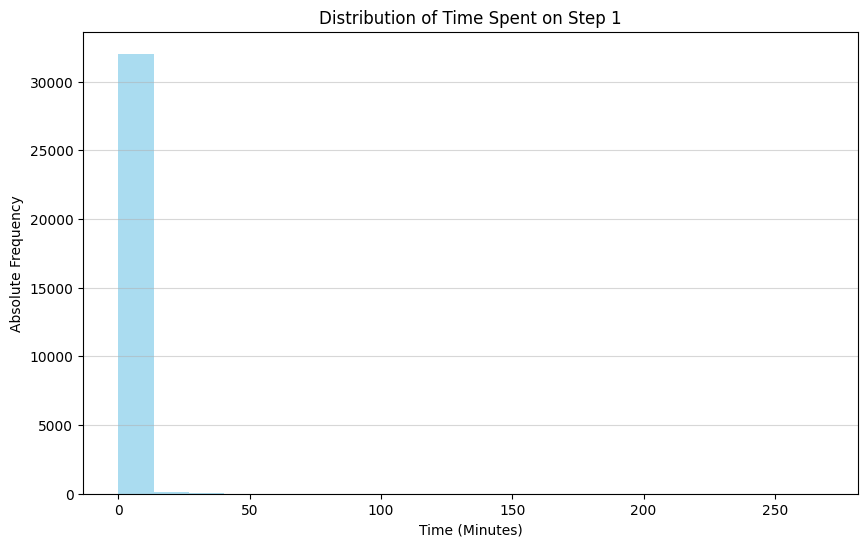

In [52]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_1_times = df_control_final['step_1']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_1_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 1')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

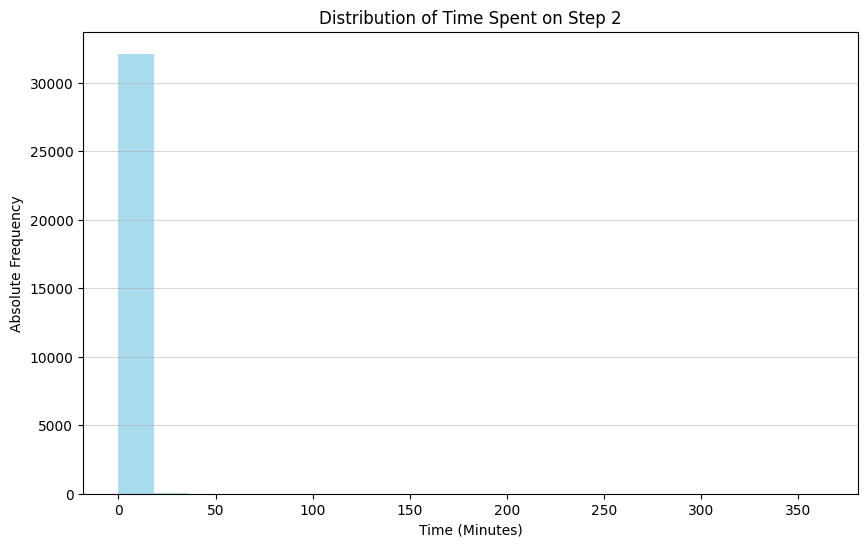

In [53]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_2_times = df_control_final['step_2']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_2_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 2')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

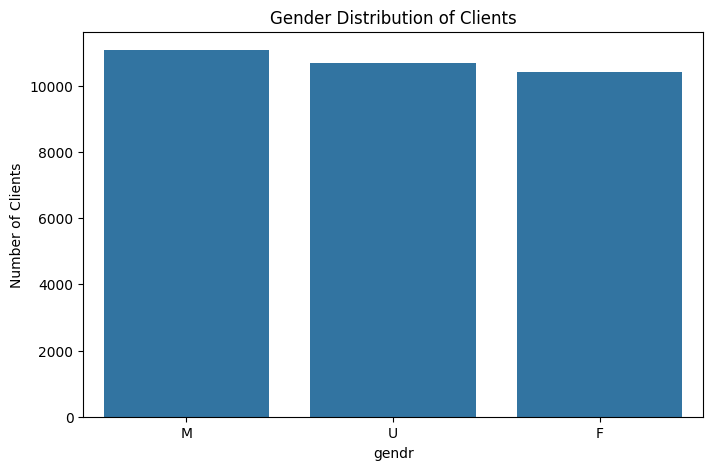

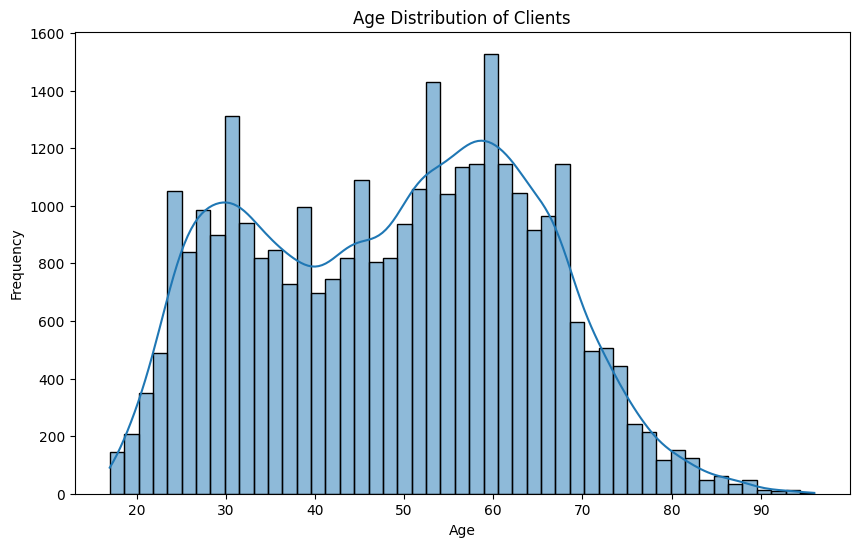

In [54]:
# 1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Clients')
plt.ylabel('Number of Clients')
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_control_final, x='clnt_age', kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [55]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [56]:
# 2. Are the primary clients younger or older, new or long-standing?

print(f"Average client age: {df_control_final['clnt_age'].mean()}")
print(f"Average client tenure (months): {df_control_final['clnt_tenure_mnth'].mean()}")

Average client age: 48.69912370653491
Average client tenure (months): 154.15969050060596


In [57]:
# 3. Client Behavior Analysis

# Time spent on each step (average)
step_columns = ['step_1', 'step_2', 'step_3']
average_time_per_step = df_control_final[step_columns].mean()
print("\nAverage time spent on each step:")
print(average_time_per_step)



Average time spent on each step:
step_1    0.679629
step_2    1.155187
step_3    1.437567
dtype: float64


In [58]:
# Completion rate (assuming 'confirm_time' indicates completion)
completion_rate = df_control_final['confirm_time'].notnull().mean() * 100
print(f"\nOverall completion rate: {completion_rate:.2f}%")


Overall completion rate: 100.00%


In [59]:
# Error rates (assuming empty values in step columns indicate errors)
error_rates = df_control_final[step_columns].isnull().mean() * 100
print("\nError rates per step:")
print(error_rates)


Error rates per step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [60]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [61]:
import pandas as pd

# 1. Data Preparation:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['date'] = df_test['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_test = df_test.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_test['next_date_time'] = df_test.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_test['time_diff_seconds'] = (df_test['next_date_time'] - df_test['date_time']).dt.total_seconds().abs()
df_test['time_diff_minutes'] = df_test['time_diff_seconds'] / 60

# 3. Pivot to Create Step Columns:
df_pivot = df_test.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)


# 5. Merge with Original Data and Select/Reorder Columns:
df_test_final = pd.merge(df_pivot, df_test[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

df_test_final = df_test_final.drop_duplicates()

#Reorder to desired column order
df_test_final = df_test_final[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]


# Get last step per visit_id
df_test_final['last_step'] = df_test_final.groupby('visit_id')['process_step'].transform('last')
df_test_final = df_test_final.drop(columns=['process_step'])

df_test_final = df_test_final.drop_duplicates()

In [62]:
df_test_final

,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,555,402506806_56087378777,637149525_38041617439_716659,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,2017-04-15,0.116667,0.533333,1.65,0.333333,0.000000,2.633333,confirm
5,647,66758770_53988066587,40369564_40101682850_311847,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,2017-04-12,0.116667,0.300000,3.15,2.716667,0.000000,6.283333,confirm
10,934,810392784_45004760546,7076463_57954418406_971348,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,2017-04-18,0.788889,0.000000,0.00,0.000000,0.000000,0.788889,start
14,1336,920624746_32603333901,583743392_96265099036_939815,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,2017-05-08,0.416667,0.433333,0.85,1.816667,0.000000,3.516667,confirm
19,1336,920624746_32603333901,614001770_19101025926_112779,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,2017-05-08,0.000000,0.000000,0.00,0.000000,1.366667,1.366667,confirm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172144,9999626,52633065_71189986073,182723364_27031318473_880901,Test,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0,2017-05-14,0.133333,0.000000,0.00,0.000000,0.000000,0.133333,step_1
172146,9999729,604429154_69247391147,99583652_41711450505_426179,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,2017-04-05,0.250000,0.000000,0.00,0.000000,0.000000,0.250000,step_1
172148,9999729,834634258_21862004160,870243567_56915814033_814203,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,2017-05-08,0.083333,0.166667,0.65,0.350000,0.000000,1.250000,confirm
172153,9999729,843385170_36953471821,493310979_9209676464_421146,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,2017-04-20,1.366667,4.783333,1.35,0.000000,0.000000,7.500000,step_2


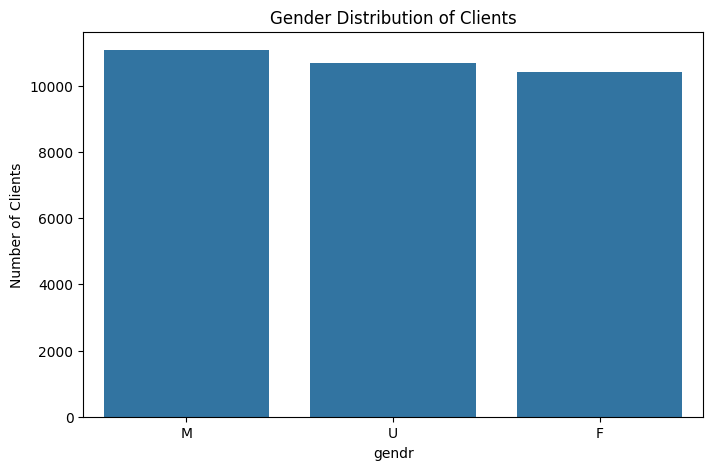

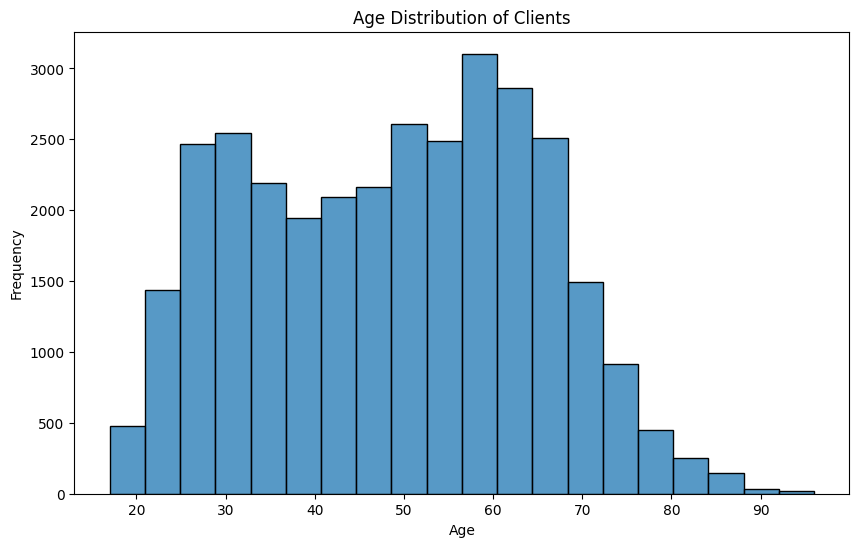

In [70]:
# 1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Clients')
plt.ylabel('Number of Clients')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_control_final, x='clnt_age', bins=20, kde=False)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [64]:
# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary:")
print(df_control_final[['clnt_age', 'clnt_tenure_mnth']].describe())




Client Demographics Summary:
           clnt_age  clnt_tenure_mnth
count  32181.000000      32181.000000
mean      48.699124        154.159691
std       15.786724         84.174236
min       17.000000         33.000000
25%       35.000000         82.000000
50%       50.000000        141.000000
75%       61.000000        196.000000
max       96.000000        669.000000


In [65]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [66]:

# 3. Client Behavior Analysis

# Time spent per step
step_time_analysis = df_control_final[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].describe()
print("\nTime Spent on Each Step (in minutes):")
print(step_time_analysis)

# Completion Rate
completed_visits = df_control_final['last_step'] == 'confirm'
completion_rate = completed_visits.mean() * 100
print(f"\nOverall Completion Rate: {completion_rate:.2f}%")

# Error Rate (Assuming NaN in a step means the user did not complete it)
error_rates = df_control_final[['step_1', 'step_2', 'step_3']].isnull().mean() * 100
print("\nError Rates Per Step:")
print(error_rates)




Time Spent on Each Step (in minutes):
         start_time        step_1        step_2        step_3  confirm_time
count  32181.000000  32181.000000  32181.000000  32181.000000  32181.000000
mean       1.233545      0.679629      1.155187      1.437567      0.167699
std        5.622045      2.856209      2.865290      3.419878      2.324682
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.083333      0.000000      0.000000      0.000000      0.000000
50%        0.283333      0.183333      0.650000      0.350000      0.000000
75%        0.800000      0.616667      1.566667      1.533333      0.000000
max      699.283333    268.300000    362.716667    121.133333    156.600000

Overall Completion Rate: 47.66%

Error Rates Per Step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [67]:
# 4. KPI and Metrics Review
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step")
print("- Drop-off Rate per Step")  # (We'll calculate this below)

# Calculate Drop-off Rate per Step
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100

dropoff_rates = {
    'start_time': 0,  # No drop-off at the start
    'step_1': calculate_dropoff_rate(df_control_final, 'step_1'),
    'step_2': calculate_dropoff_rate(df_control_final, 'step_2'),
    'step_3': calculate_dropoff_rate(df_control_final, 'step_3')
}

print("\nDrop-off Rates per Step:")
print(dropoff_rates)


Key Performance Indicators (KPIs):
- Completion Rate
- Time Spent on Each Step
- Error Rate per Step
- Drop-off Rate per Step

Drop-off Rates per Step:
{'start_time': 0, 'step_1': np.float64(52.344551132655916), 'step_2': np.float64(52.344551132655916), 'step_3': np.float64(52.344551132655916)}


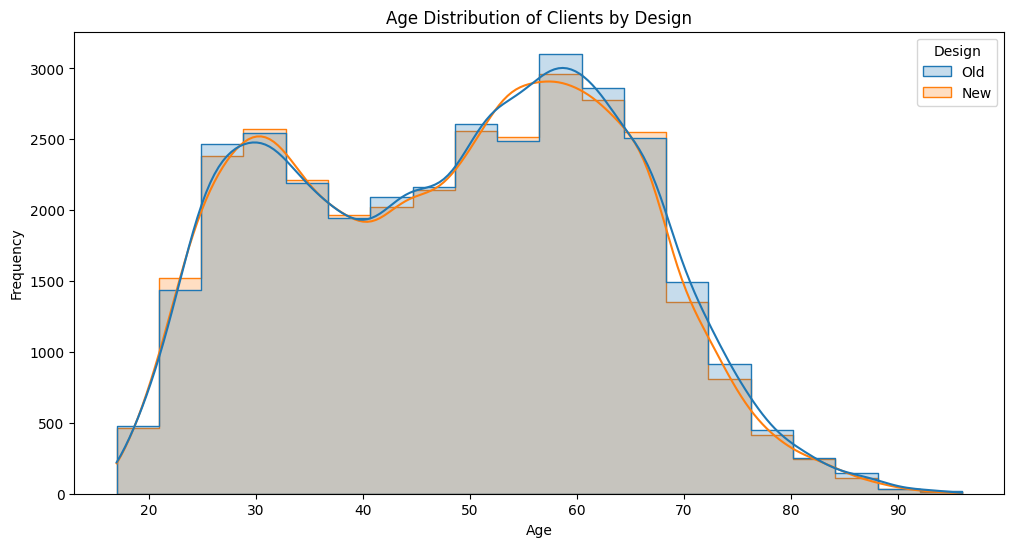

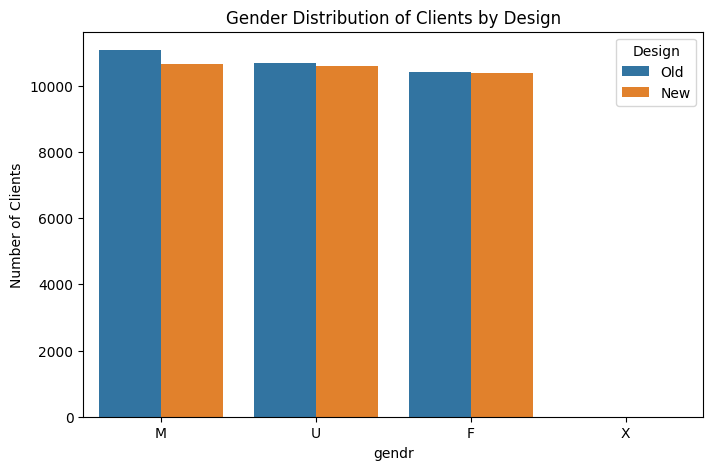


Client Demographics Summary by Design:
       clnt_age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Design                                                                
New     31630.0  48.352087  15.662886  17.0  34.5  49.5  60.5  96.0   
Old     32181.0  48.699124  15.786724  17.0  35.0  50.0  61.0  96.0   

       clnt_tenure_mnth                                                   \
                  count        mean        std   min   25%    50%    75%   
Design                                                                     
New             31630.0  152.322257  83.028884  33.0  82.0  138.0  193.0   
Old             32181.0  154.159691  84.174236  33.0  82.0  141.0  196.0   

               
          max  
Design         
New     669.0  
Old     669.0  


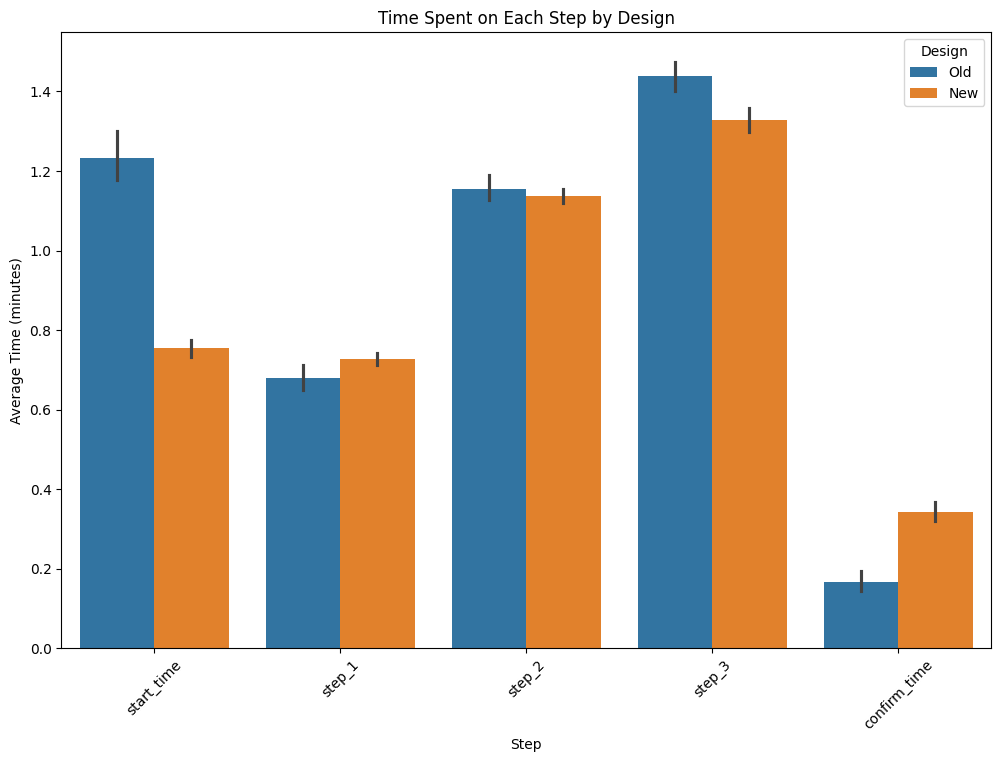


Key Performance Indicators (KPIs):
- Completion Rate
- Time Spent on Each Step
- Error Rate per Step (Assuming NaN indicates error)
- Drop-off Rate per Step

Completion Rate by Design:
Design
New    60.818843
Old    47.655449
Name: last_step, dtype: float64

Error Rates Per Step by Design:
        step_1  step_2  step_3
Design                        
New        0.0     0.0     0.0
Old        0.0     0.0     0.0

Drop-off Rates per Step by Design:
        start_time     step_1     step_2     step_3
Design                                             
New            0.0  39.181157  39.181157  39.181157
Old            0.0  52.344551  52.344551  52.344551


/tmp/ipykernel_353771/352563895.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropoff_rates = combined_df.groupby('Design').apply(


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into df_control_final and df_test_final

# Combine DataFrames and add a 'Design' column to distinguish between them
df_control_final['Design'] = 'Old'
df_test_final['Design'] = 'New'
combined_df = pd.concat([df_control_final, df_test_final])

# 1. Who are the primary clients using this online process?

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='clnt_age', hue='Design', bins=20, kde=True, element="step")
plt.title('Age Distribution of Clients by Design')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_df, x='gendr', hue='Design')
plt.title('Gender Distribution of Clients by Design')
plt.ylabel('Number of Clients')
plt.show()

# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary by Design:")
print(combined_df.groupby('Design')[['clnt_age', 'clnt_tenure_mnth']].describe())

# 3. Client Behavior Analysis

# Time spent per step by design
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_df.melt(id_vars=['visit_id', 'Design'], value_vars=['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']),
            x='variable', y='value', hue='Design')
plt.title('Time Spent on Each Step by Design')
plt.xlabel('Step')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# 4 & 5. KPI Review & Identification
# Key Performance Indicators (KPIs)
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step (Assuming NaN indicates error)")
print("- Drop-off Rate per Step")

# 6. Calculate KPIs

# Completion Rate
completion_rate = combined_df.groupby('Design')['last_step'].apply(lambda x: (x == 'confirm').mean() * 100)
print("\nCompletion Rate by Design:")
print(completion_rate)

# Error Rates (Assuming NaN in a step means the user did not complete it)
error_rates = combined_df.groupby('Design')[['step_1', 'step_2', 'step_3']].apply(lambda x: x.isnull().mean() * 100)
print("\nError Rates Per Step by Design:")
print(error_rates)

# Drop-off Rate
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100 if total_reached_step > 0 else 0

dropoff_rates = combined_df.groupby('Design').apply(
    lambda x: pd.Series({
        'start_time': 0,  
        'step_1': calculate_dropoff_rate(x, 'step_1'),
        'step_2': calculate_dropoff_rate(x, 'step_2'),
        'step_3': calculate_dropoff_rate(x, 'step_3')
    })
)
print("\nDrop-off Rates per Step by Design:")
print(dropoff_rates)
